# Spline in Different Conditions
---
To define the slopes $d_k$ in our spline interpolation, Using the condition $P''(x_k^+) = P''(x_k^-)\ $gives us $n-2$ linear equations of $n$ unknowns $d_k$:  

$$h_kd_{k−1} + 2(h_{k−1} + h_k)d_k + h_{k−1}d_{k+1} = 3(h_kδ_{k−1} + h_{k−1}δ_k),\quad k = 1,\ldots,n-2.$$  
Now we discuss the behavior at end ponts $x_0$ and $x_{n-1}$ to obtain two more equations.

### Natural
---
<details><summary>Natural condition on end points.</summary>
<p> 
In this case we require $P''(x_0) = 0\ $and $P''(x_{n-1}) = 0\ $.  
This gives  
    
$$P''(x_0) = 2\frac{3(y_1-y_0) - (d_1+2d_0)h_0}{{h_0}^2} = 0,$$  
$$P''(x_{n-1}) = 2\frac{3(y_{n-1}-y_{n-2}) - (2d_{n-1}+d_{n-2})h_{n-2}}{{h_{n-2}}^2} = 0.$$ 

That is,  
$$2d_0 + d_1 = 3\delta_0,$$  
$$d_{n-2} + 2d_{n-1} = 3\delta_{n-2}.$$  
Now we have $n$ linear equations in $n$ unknowns: $Ad = r,\ $where  

$$A = \left(\begin{matrix}
            2 &&1 && && && &&\\
            h_1 &&2(h_0+h_1) &&h_0 && && &&\\
             &&h_2 &&2(h_1+h_2) &&h_1 && &&\\
             && &&\ddots &&\ddots &&\ddots &&\\
              && && &&h_{n-2} &&2(h_{n-3}+h_{n-2}) &&h_{n-3}\\
              && && && &&1 &&2
            \end{matrix}\right),$$  
$$d = \left(\begin{matrix}
            d_0\\
            d_1\\
            \vdots\\
            d_{n-1}
            \end{matrix}\right),
\quad
  r = \left(\begin{matrix}
            3\delta_0\\
            3(h_1\delta_0 + h_0\delta_1)\\
            3(h_2\delta_1 + h_1\delta_2)\\
            \vdots\\
            3(h_{n-2}\delta_{n-3} + h_{n-3}\delta_{n-2})\\
            3\delta_{n-2}
            \end{matrix}\right).$$  
            
Note that $A$ is a tridiagonal matrix, so here we apply <a href="https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.solve_banded.html"> scipy.linalg.solve_banded</a> to solve $Ad = r$.
</p>
</details>

### Not-a-knot  
---
<details><summary>Not-a-knot condition on end points.</summary>
<p> 
Here we required the third derivative is also continuous at the knots $x_1$ and $x_{n-2}$, i.e. that 
    
$$P'''({x_1}^+) = P'''({x_1}^-),$$  
$$P'''({x_{n-2}}^+) = P'''({x_{n-2}}^-).$$  

This gives  
$$\frac{1}{{h_0}^2}d_0 + \left(\frac{1}{{h_0}^2} - \frac{1}{{h_1}^2}d_1 - \frac{1}{{h_1}^2}d_2 \right) = 2\left( \frac{y_1 - y_0}{{h_0}^3} - \frac{y_2 - y_1}{{h_1}^3}\right),$$  
$$\frac{1}{{h_{n-3}}^2}d_{n-3} + \left(\frac{1}{{h_{n-3}}^2} - \frac{1}{{h_{n-2}}^2}d_{n-2} - \frac{1}{{h_{n-2}}^2}d_{n-1} \right) = 2\left( \frac{y_{n-2} - y_{n-3}}{{h_{n-3}}^3} - \frac{y_{n-1} - y_{n-2}}{{h_{n-2}}^3}\right).$$  

That is,  
$${h_1}^2d_0 + 2({h_1}^2 - {h_0}^2)d_1 - {h_0}^2d_2 = 2({h_1}^2\delta_0 + {h_0}^2\delta_1),$$
$${h_{n-2}}^2d_{n-3} + 2({h_{n-2}}^2 - {h_{n-3}}^2)d_{n-2} - {h_{n-3}}^2d_{n-1} = 2({h_{n-2}}^2\delta_{n-3} + {h_{n-3}}^2\delta_{n-2}).$$  

And we have $n$ linear equations in $n$ unknowns: $Ad = r,\ $where 

$$A = \left(\begin{matrix}
            {h_1}^2 &&2({h_1}^2 - {h_0}^2) &&-{h_0}^2 && && &&\\
            h_1 &&2(h_0+h_1) &&h_0 && && &&\\
             &&h_2 &&2(h_1+h_2) &&h_1 && &&\\
             && &&\ddots &&\ddots &&\ddots &&\\
              && && &&h_{n-2} &&2(h_{n-3}+h_{n-2}) &&h_{n-3}\\
              && && &&{h_{n-2}}^2 &&2({h_{n-2}}^2 - {h_{n-3}}^2) &&-{h_{n-3}}^2
            \end{matrix}\right),$$  
$$d = \left(\begin{matrix}
            d_0\\
            d_1\\
            \vdots\\
            d_{n-1}
            \end{matrix}\right),
\quad
  r = \left(\begin{matrix}
            3\delta_0\\
            3(h_1\delta_0 + h_0\delta_1)\\
            3(h_2\delta_1 + h_1\delta_2)\\
            \vdots\\
            3(h_{n-2}\delta_{n-3} + h_{n-3}\delta_{n-2})\\
            3\delta_{n-2}
            \end{matrix}\right).$$ 
            
Note that $A$ is a band matrix, so here we apply <a href="https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.solve_banded.html"> scipy.linalg.solve_banded</a> to solve $Ad = r$.
</p>
</details>

### Periodic
---
<details><summary>Periodic condition.</summary>
<p> 
If $y_{n-1} = y_0,\ y_{k+n-1} = y_k\ $is periodic, then the corresponding $h_k$ and $\delta_k$ are also periodic.  
Thus we can simply get $Ad = r,\ $where  

$$A = \left(\begin{matrix}
            2(h_{n-2}+h_0) &&h_{n-2} && && &&h_0\\
            h_1 &&2(h_0+h_1) &&h_0 && && \\
             &&h_2 &&2(h_1+h_2) &&h_1 && \\
             && &&\ddots &&\ddots &&\ddots\\
            h_{n-3} && && &&h_{n-2} &&2(h_{n-3}+h_{n-2})\\
            \end{matrix}\right),$$  
$$d = \left(\begin{matrix}
            d_0\\
            d_1\\
            \vdots\\
            d_{n-2}
            \end{matrix}\right),
\quad
  r = \left(\begin{matrix}
            3(h_0\delta_{n-2} + h_{n-2}\delta_0)\\
            3(h_1\delta_0 + h_0\delta_1)\\
            3(h_2\delta_1 + h_1\delta_2)\\
            \vdots\\
            3(h_{n-2}\delta_{n-3} + h_{n-3}\delta_{n-2})
            \end{matrix}\right).$$  
            
Note that $A$ is a periodic tridiagonal matrix, so we apply <a href="https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.solve_banded.html"> scipy.linalg.solve_banded</a> to a matrix $A'$ first and then do a few more steps to get the solution $d$.   

See more details in <a href="https://www.cfd-online.com/Wiki/Tridiagonal_matrix_algorithm_-_TDMA_(Thomas_algorithm)">Tridiagonal matrix algorithm</a> and <a href="https://en.wikipedia.org/wiki/Sherman%E2%80%93Morrison_formula">Sherman–Morrison formula</a>.
</p>
</details>

Import libraries.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

Compute slopes for spline in different condition.

In [3]:
def getA(h, n, method='natural'):
    if method == 'natural':
        d1 = np.concatenate((h[1:n-1], np.array([1, 0])))
        d2 = np.concatenate((np.array([2]), 2*(h[0:n-2]+h[1:n-1]), np.array([2])))
        d3 = np.concatenate((np.array([0, 1]), h[0:n-2]))
        
        return 1, 1, np.array([d1, d2, d3])
    
    elif method == 'not-a-knot':
        d1 = np.ones(n)
        d1[2] = -h[0]**2
        
        d2 = np.concatenate((np.array([0, h[1]**2-h[0]**2]), h[0:n-2]))
        d3 = np.concatenate((np.array([h[1]**2]), 2*(h[0:n-2]+h[1:n-1]), np.array([h[n-3]**2])))
        d4 = np.concatenate((h[1:n-1], np.array([h[n-3]**2-h[n-2]**2, 0])))
        
        
        d5 = np.ones(n)
        d5[n-3] = -h[n-2]**2
        
        return 2, 2, np.array([d1, d2, d3, d4, d5])
    
    elif method == 'periodic':
        d1 = np.concatenate((np.array([0, h[n-2]]), h[0:n-3]))
        d2 = np.concatenate((np.array([4*(h[n-2]+h[0])]), 
                             2*(h[0:n-3]+h[1:n-2]), 
                             np.array([2*(h[n-3]+h[n-2])+h[0]*h[n-3]/(2*(h[n-2]+h[0]))])))
        d3 = np.concatenate((h[1:n-1], np.array([0])))
        
        return 1, 1, np.array([d1, d2, d3])

In [4]:
def getr(h, delta, n, method='natural'):
    if method == 'natural':
        return np.concatenate((np.array([3*delta[0]]), 
                            3*(h[1:n-1]*delta[0:n-2] + h[0:n-2]*delta[1:n-1]), 
                            np.array([3*delta[n-2]])))
    
    elif method == 'not-a-knot':
        return np.concatenate((np.array([2*(h[1]**2 * delta[0] - h[0]**2 * delta[1])]), 
                            3*(h[1:n-1]*delta[0:n-2] + h[0:n-2]*delta[1:n-1]), 
                            np.array([2*(h[n-3]**2 * delta[n-2] - h[n-2]**2 * delta[n-3])])))
    
    elif method == 'periodic':
        return np.concatenate((np.array([3*(h[0]*delta[n-2] + h[n-2]*delta[0])]), 
                            3*(h[1:n-1]*delta[0:n-2] + h[0:n-2]*delta[1:n-1])))

In [5]:
def splineslopes(h, delta, n, method='natural'):
    l, u, ab = getA(h, n, method)
    r = getr(h, delta, n, method)
    
    if method == 'periodic':
        w = np.zeros(n-1)
        w[0] = -2*(h[n-2]+h[0])
        w[n-2] = h[n-3]
        
        v = np.zeros(n-1)
        v[0] = 1
        v[n-2] = -h[0]/(2*(h[n-2]+h[0]))
        
        y = solve_banded((l, u), ab, r)
        q = solve_banded((l, u), ab, w)
        
        d = y - (v.T@y / (1+v.T@q)) * q
        d = np.concatenate((d, np.array([d[0]])))
        return d
    else:
        return solve_banded((l, u), ab, r)

Construct spline interpolation.

In [6]:
def geth(x, n):
    return x[1:n] - x[0: n-1] # h_0 to h_n-2. len(h) = n-1

def getdelta(y, h, n):
    return (y[1: n] - y[0:n-1]) / h # delta_0 to delta_n-2. len(delta) = n-1

def getc(delta, d, h, n):
    return (3*delta - 2*d[0:n-1] - d[1:n]) / h #c_0 to c_n-2. len(c) = n-1

def getb(delta, d, h, n):
    return (d[0:n-1] - 2*delta + d[1:n]) / h**2 #b_0 to b_n-2. len(b) = n-1

In [7]:
def myCS(x, y, method='natural'):
    
    # First derivative
    n = len(x)
    h = geth(x, n)
    delta = getdelta(y, h, n)
    d = splineslopes(h, delta, n, method)
    
    # Piecewise polynomial coefficients
    c = getc(delta, d, h, n)
    b = getb(delta, d, h, n)
    
    def P(U):
        
        notArray = False
        if isinstance(U, (int, float)):
            notArray = True
            U = np.array([U])
        
        value = []
        for u in U:
            # Find subinterval indices k so that x_k <= u < x_k+1
            for k in range(n):
                if np.any(x[k] > u):
                    break
            k -= 1
            
            # Evaluate interpolant
            s = u - x[k]
            value.append(y[k] + d[k]*s + c[k]*s**2 + b[k]*s**3)
        
        if notArray:
            return value[0]
        else:
            return np.array(value)
        
    return P

Read a list of points from the file.

In [8]:
pts_x = [] # x coordinate of selected points
pts_y = [] # y coordinate of selected points
with open('ex.txt') as f:
    n = int(f.readline()) # number of selected points
    for line in f:
        pt = line.rsplit()
        x, y = float(pt[0]), float(pt[1])
        pts_x.append(x)
        pts_y.append(y)
pts_x = np.asarray(pts_x)
pts_y = np.asarray(pts_y)

Plot the result.

In [9]:
t = np.arange(n)
mycs_x = [myCS(t, pts_x, method='natural'), myCS(t, pts_x, method='not-a-knot')]
mycs_y = [myCS(t, pts_y, method='natural'), myCS(t, pts_y, method='not-a-knot')]

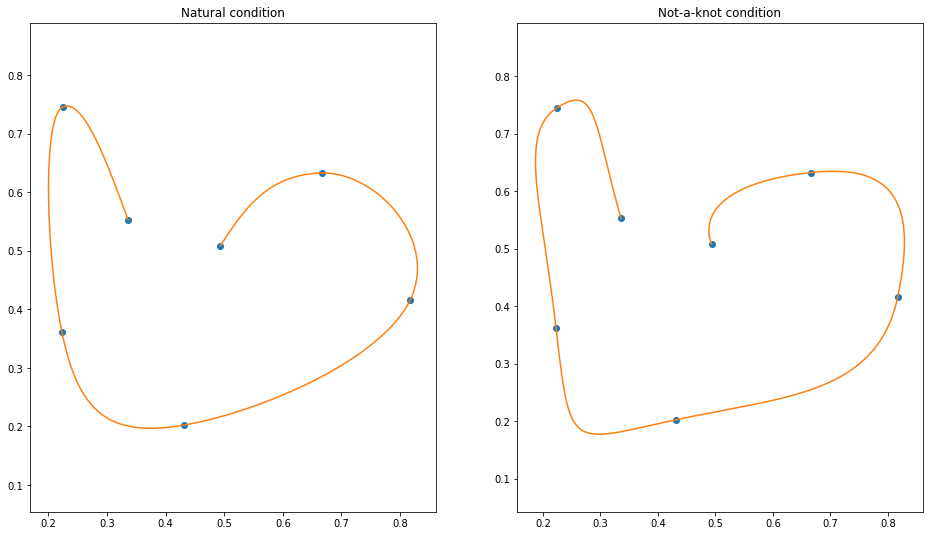

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16, 9))

t1 = np.linspace(0, n-1, 1000)
ax[0].plot(pts_x, pts_y, 'o')
ax[0].plot(mycs_x[0](t1), mycs_y[0](t1))
ax[1].plot(pts_x, pts_y, 'o')
ax[1].plot(mycs_x[1](t1), mycs_y[1](t1))

ax[0].axis('equal')
ax[1].axis('equal')
ax[0].set_title('Natural condition')
ax[1].set_title('Not-a-knot condition')
plt.show()

Make the list of points satisfy the periodic condition.

In [11]:
n += 1
pts_x = np.concatenate((pts_x, np.array([pts_x[0]])))
pts_y = np.concatenate((pts_y, np.array([pts_y[0]])))

Plot the closed curve.

In [12]:
t = np.arange(n)
mycs_x = myCS(t, pts_x, method='periodic')
mycs_y = myCS(t, pts_y, method='periodic')

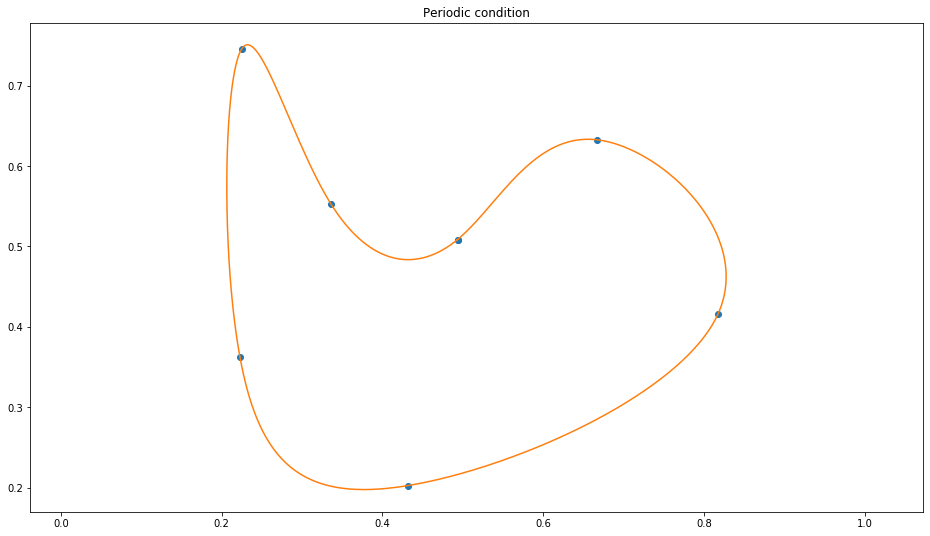

In [13]:
fig, ax = plt.subplots(figsize=(16, 9))

t1 = np.linspace(0, n-1, 1000)
ax.plot(pts_x, pts_y, 'o')
ax.plot(mycs_x(t1), mycs_y(t1))

ax.axis('equal')
ax.set_title('Periodic condition')
plt.show()

Use spline in periodic condition to plot a circle.

In [14]:
theta = 2 * np.pi * np.linspace(0, 1, 5)
c = myCS(theta, np.cos(theta), method='periodic')
s = myCS(theta, np.sin(theta), method='periodic')

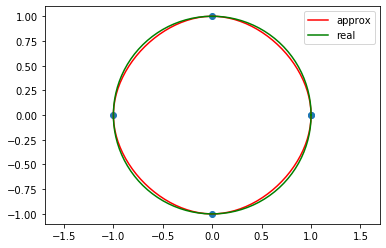

In [15]:
fig, ax = plt.subplots()

t2 = 2 * np.pi * np.linspace(0, 1, 100)
ax.plot(np.cos(theta), np.sin(theta), 'o')
ax.plot(c(t2), s(t2), color='r', label='approx')
ax.plot(np.cos(t2), np.sin(t2), color='g', label='real')
ax.legend()
ax.axis('equal')

plt.show()